In [10]:
from PIL import Image, ImageDraw, ImageFont, ImageOps
import sys
from string import ascii_lowercase
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
%matplotlib inline

In [11]:
normal_shifts = {
    'a':(0,-21),
    'b':(0,-20),
    'c':(2, -21),
    'd':(-1, -21),
    'e':(1, -21),
    'f':(10, -19),
    'g':(-1, -29),
    'h':(-1, -20),
    'i':(14 ,-20),
    'j':(14 ,-27),
    'k':(2, -20),
    'l':(12, -20),
    'm':(-14, -20),
    'n':(-2, -20),
    'o':(0, -21),
    'p':(0, -28),
    'q':(-2, -29),
    'r':(9, -22),
    's':(2, -22),
    't':(12, -20),
    'u':(-2, -20),
    'v':(1, -20),
    'w':(-8, -20),
    'x':(2, -22),
    'y':(1, -29),
    'z':(2, -22),
    '1':(-1, -19),
    '2':(-1, -19),
    '3':(-1, -19),
    '4':(-1, -19),
    '5':(-1, -19),
    '6':(-1, -19),
    '7':(-1, -19),
    '8':(-1, -19),
    '9':(-1, -19),
    '0':(-1, -19),
    ' ':(0, 0),
    '-':(8, -23),
    '_':(-1, -39),
    '':(0, 0)
    
}

In [12]:
normal_shifts

{'': (0, 0),
 ' ': (0, 0),
 '-': (8, -23),
 '0': (-1, -19),
 '1': (-1, -19),
 '2': (-1, -19),
 '3': (-1, -19),
 '4': (-1, -19),
 '5': (-1, -19),
 '6': (-1, -19),
 '7': (-1, -19),
 '8': (-1, -19),
 '9': (-1, -19),
 '_': (-1, -39),
 'a': (0, -21),
 'b': (0, -20),
 'c': (2, -21),
 'd': (-1, -21),
 'e': (1, -21),
 'f': (10, -19),
 'g': (-1, -29),
 'h': (-1, -20),
 'i': (14, -20),
 'j': (14, -27),
 'k': (2, -20),
 'l': (12, -20),
 'm': (-14, -20),
 'n': (-2, -20),
 'o': (0, -21),
 'p': (0, -28),
 'q': (-2, -29),
 'r': (9, -22),
 's': (2, -22),
 't': (12, -20),
 'u': (-2, -20),
 'v': (1, -20),
 'w': (-8, -20),
 'x': (2, -22),
 'y': (1, -29),
 'z': (2, -22)}

In [13]:
ascii_lowercase + ' ' + '-' + '_' + ''.join(map(str, range(0, 11)))

'abcdefghijklmnopqrstuvwxyz -_012345678910'

In [14]:
def create_dataset(listOfOffsets,normal_shifts,rotate=True, shift=True):
    letter_string = ascii_lowercase + ' ' + '-' + '_' + ''.join(map(str, range(0, 11)))
    dirname = '../test/'
    backgrounds_dir = '../cropped_backgrounds/'
    count = 0
    if not os.path.exists(dirname):
        os.makedirs(dirname)
    ##for every offset iterate over the string
    class_number = 0
    for letter in letter_string:
        letter_dir = os.path.join(dirname, str(class_number))
        if not os.path.exists(letter_dir):
            os.mkdir(letter_dir)
        class_number+=1
        for offset_pair in listOfOffsets:
            if not shift:
                offset_pair[0] = 0;
                offset_pair[1] = 0;
            if not rotate:
                offset_pair[2] = 0;
            usr_font = ImageFont.truetype('../arial.ttf', 30)
            width, height = usr_font.getsize(letter)
            image = Image.new("RGBA", (width, height), (255, 255, 255, 0))
            d_usr = ImageDraw.Draw(image)
            d_usr = d_usr.text((0, 0), letter, font = usr_font, fill = (0, 0, 0))
            image = image.rotate(offset_pair[2], resample=Image.BICUBIC, expand=True)
            sx, sy = image.size
            px, py = int(offset_pair[0]), int(offset_pair[1])
            filenames = os.listdir(backgrounds_dir)
            for loaded_image_path in [filenames[i] for i in np.random.randint(0, 3173, 300)]:
                loaded_image = Image.open(backgrounds_dir + loaded_image_path)
                x, y = normal_shifts[letter]
                loaded_image.paste(image, (px+sx+x, py+sy+y),  image)
                if os.path.exists(letter_dir + '/' + letter + '_' + str(count) + '.jpg'):
                    count+=1
                loaded_image.save(letter_dir + '/' + letter + '_' + str(count) + '.jpg', quality=95)

### Let's generate some normal random numbers

In [15]:
import shutil

In [16]:
#set parameters
mean =  [0, 0, 0]
sigma = [[4, 0, 0],[0, 4, 0], [0, 0, 45]]
#coordinates of center

In [17]:
#generate random values
shifts_list = np.random.multivariate_normal(mean, sigma, 50)

In [18]:
create_dataset(shifts_list, normal_shifts)

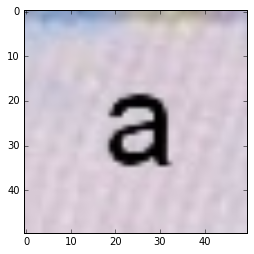

In [21]:
plt.imshow(cv2.imread('../test/0/a_0.jpg'))

In [22]:
plt.imshow(cv2.imread('../dataset/0/a_11104.jpg_transformed.jpg')[:,:,2])

TypeError: 'NoneType' object has no attribute '__getitem__'

In [214]:
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0.00001
        var = 0.000001
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = image
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

In [186]:
img = cv2.imread("images/a_10.jpg")
noisyimg = noisy("speckle", img)
sp = noisy("s&p", img)

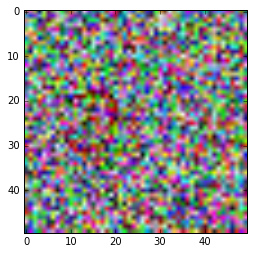

In [187]:
plt.imshow(noisyimg+sp)

In [294]:
dirname = '../cropped_backgrounds'
if not os.path.exists(dirname):
    os.mkdir(dirname)
count = 0
for img in os.listdir('../backgrounds/'):
    print img
    temp = cv2.imread('../backgrounds/' + img)
    offset = 50
    shift = 20
    while(shift < temp.shape[1]):
        cropped = temp[0:50, shift:shift+offset]
        if(cropped.shape[0] == 50 and cropped.shape[1] == 50): 
            cv2.imwrite(dirname + '/' + str(count) + '.png', cropped)
            count+=1
        shift+=offset

uppertp-polbaczkowska-assadi--aleksandra-beata.jpg
uppertp-usaaponte-melendez--alberto.jpg
uppertp-fraheintje--alain-georges-adolphe.jpg
bottom_p-tgogbedema--adjo-akpene.jpg
uppertp-frabernier--jean-philippe-claude-james.jpg
bottom_p-belde-becker--willem-j-g_2.jpg
bottom_p-usaaponte-melendez--alberto.jpg
bottom_p-cypskapoullis--antonis.jpg
bottom_p-chlghamri--noureddine.jpg
uppertp-belde-becker--willem-joanna-gommaar.jpg
bottom_p-nldgeerdink--iwanjka_2.jpg
uppertp-phlcatamora--roy.jpg
bottom_p-gtmdiaz-de-leon--jennifer-paola.jpg
bottom_p-tzakiwale--therezia-edward.jpg
uppertpmcherochat--pierre-andre.jpg
uppertp-espcordova-gonzalez--pilar.jpg
uppertp-mexmartinez-moncada--adrian.jpg
uppertp-argmaller--gustavo-sergio.jpg
bottom_p-irngouran-oreimi--payam.jpg
uppertp-isrbarak--yuval.jpg
bottom_p-phlbaguio--jairus-hermelo.jpg
bottom_p-lvaliepina--ilze.jpg
uppertp-chlghamri--noureddine.jpg
bottom_p-usaabeyta--louise-doris.jpg
bottom_p-beldeprettere--hans-k-g-a.jpg
uppertpcrwairibagiza--claris

TypeError: Image data can not convert to float

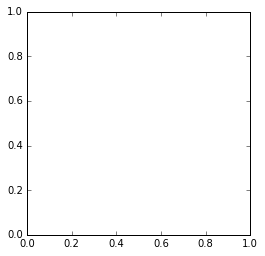

In [23]:
plt.imshow(cv2.imread('../test/j_83.jpg'))

In [1]:
l = [1,2,3,4,5]

TypeError: list indices must be integers, not list

In [72]:
testfiles = os.listdir('../transformed_images/')

In [73]:
files = map(lambda x: cv2.imread('../transformed_images/' + x), [testfiles[i] for i in np.random.randint(0,100000, 100)])

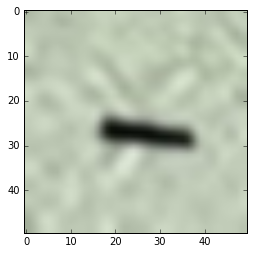

In [109]:
plt.imshow(files[34])

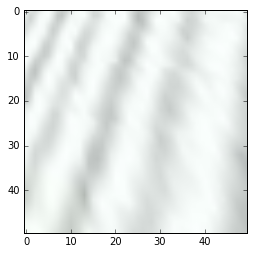

In [169]:
pts1 = np.float32([[5, 5],[40, 7],[7, 38],[30,30]])

M = cv2.getPerspectiveTransform(pts1, pts2)

plt.imshow(cv2.warpPerspective(files[3], M, (50, 50)))

In [25]:
if not os.path.exists('../blurred_images'):
    os.makedirs('../blurred_images')
filenames = os.listdir('../test/')
for image_name in filenames:
    image  = cv2.imread('../test/' + image_name)
    #apply gaussian blur
    image = cv2.GaussianBlur(image, (5,5), 0)
    cv2.imwrite('../blurred_images/' + image_name + '_blurred.jpg', image)

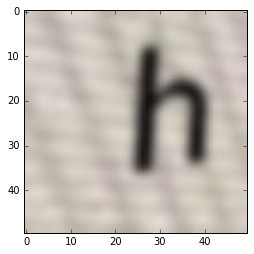

In [65]:
im = files[8]
shifts = np.random.randint(0, 10, 8)
p1 = np.float32([[shifts[0], shifts[1]], [50 - shifts[2], shifts[3]], [shifts[4], 50 - shifts[5]], [50 - shifts[6], 50 - shifts[7]]])
p2 = np.float32([[0, 0],[50, 0],[0, 50],[50, 50]])
M = cv2.getPerspectiveTransform(p1, p2)
im = cv2.warpPerspective(im, M, (50, 50))
im = cv2.GaussianBlur(im, (5,5), 0)
plt.imshow(im)

### Generate training dataset

In [24]:
p_dirname = '../dataset/'
if not os.path.exists(p_dirname):
    os.mkdir(p_dirname)
    images_to_transform = '../test/'
for letter_dir in os.listdir(images_to_transform):
    path_to_image = os.path.join(images_to_transform, letter_dir)
    if not os.path.exists(os.path.join(p_dirname, letter_dir)):
        os.mkdir(os.path.join(p_dirname, letter_dir))
    for image_name in os.listdir(path_to_image):
        image = cv2.imread(os.path.join(path_to_image,image_name))
        shifts = np.random.randint(0, 10, 8)
        #apply warp
        pts1 = np.float32([[shifts[0], shifts[1]], [50 - shifts[2], shifts[3]], [shifts[4], 50 - shifts[5]], [50 - shifts[6], 50 - shifts[7]]])
        pts2 = np.float32([[0, 0],[50, 0],[0, 50],[50, 50]])
        M = cv2.getPerspectiveTransform(pts1, pts2)
        image = cv2.warpPerspective(image, M, (50, 50))
        image = cv2.GaussianBlur(image, (5,5), 0)
        cv2.imwrite(os.path.join(p_dirname, letter_dir, image_name + '_transformed.jpg'), image)   

### Generate testset

In [25]:
np.random.seed(314159268)
p_dirname = '../testset/'
if not os.path.exists(p_dirname):
    os.mkdir(p_dirname)
    images_to_transform = '../test/'
for letter_dir in os.listdir(images_to_transform):
    path_to_image = os.path.join(images_to_transform, letter_dir)
    if not os.path.exists(os.path.join(p_dirname, letter_dir)):
        os.mkdir(os.path.join(p_dirname, letter_dir))
    image_files = os.listdir(path_to_image)
    test_files = [image_files[fileIndex] for fileIndex in np.random.randint(0,len(image_files), 1000)]
    for image_name in test_files:
        image = cv2.imread(os.path.join(path_to_image,image_name))
        shifts = np.random.randint(0, 10, 8)
        #apply warp
        pts1 = np.float32([[shifts[0], shifts[1]], [50 - shifts[2], shifts[3]], [shifts[4], 50 - shifts[5]], [50 - shifts[6], 50 - shifts[7]]])
        pts2 = np.float32([[0, 0],[50, 0],[0, 50],[50, 50]])
        M = cv2.getPerspectiveTransform(pts1, pts2)
        image = cv2.warpPerspective(image, M, (50, 50))
        image = cv2.GaussianBlur(image, (5,5), 0)
        cv2.imwrite(os.path.join(p_dirname, letter_dir, image_name + '_transformed.jpg'), image)   